In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dropping 'customer ID' as it is unique to all customers and does not contribute anything to the final churn

In [5]:
df.drop(['customerID'],axis=1,inplace=True)

Checking if there are any null values in the dataset

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Checking if there are any NAN values in the dataset

In [7]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
# dropping all tenure rows with 0 values
df.drop(labels=df[df['tenure']==0].index,axis=0,inplace=True)
df[df['tenure']==0].index

Int64Index([], dtype='int64')

In [11]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Label encoding the Churn column (0 = No, 1 = Yes)

In [12]:
from sklearn import preprocessing
LE = preprocessing.LabelBinarizer()
df['Churn'] = LE.fit_transform(list(df['Churn']))

Checking out how many churned and not churned

Churned percentage is 26.58
Not churned percentage is 73.42


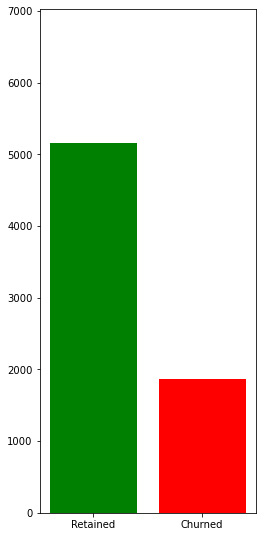

In [13]:
churned = round((df['Churn'].value_counts()[1]/df.shape[0])*100,2)
notchurned = round((df['Churn'].value_counts()[0]/df.shape[0])*100,2)
print(f"Churned percentage is {churned}")
print(f"Not churned percentage is {notchurned}")
plotter = {'Retained':df['Churn'].value_counts()[0],'Churned':df['Churn'].value_counts()[1]}
fig = plt.figure(figsize=(3,7))
axis = fig.add_axes([0,0,1,1])
axis.bar(list(plotter.keys()), list(plotter.values()),color=['green','red']);
axis.set_ylim(0,df.shape[0])
plt.show()
# Adding a semi colon in the end of plot statement will suppress unwanted output from the plot

Splitting all the categorical and continuous variables

In [14]:
categorical = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
continuous = ['tenure','MonthlyCharges','TotalCharges']

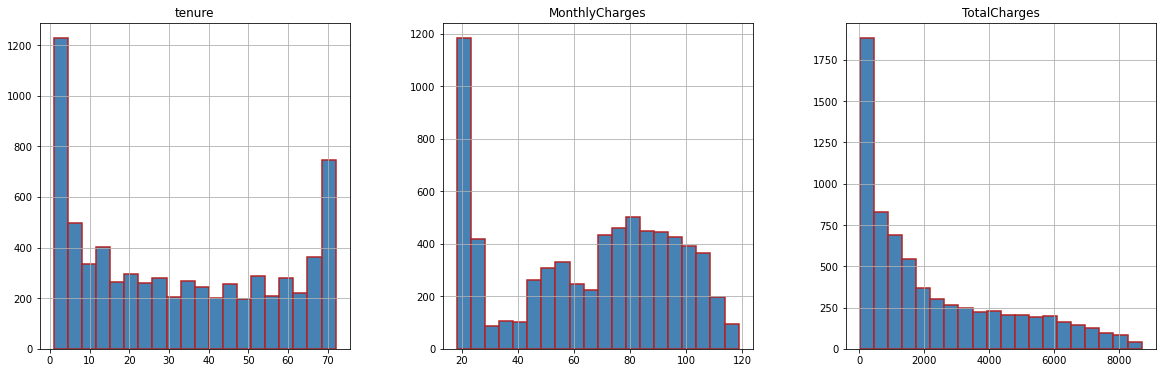

In [15]:
df[continuous].hist(figsize=(20, 6),
                          bins=20,
                          layout=(1, 3),
                          color='steelblue',
                          edgecolor='firebrick',
                          linewidth=1.5);


### Analysis of the above graph
--> here

Plotting categorical values against in histgrams

In [16]:
def plot_categorical(feature):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(x=feature,
                  hue='Churn',
                  data=df,
                  ax=ax1)
    ax1.set_ylabel('Count')
    ax1.legend(labels=['Retained', 'Churned'])

    sns.barplot(x=feature,
                y='Churn',
                data=df,
                ax=ax2)
    ax2.set_ylabel('Churn rate')


    plt.tight_layout()

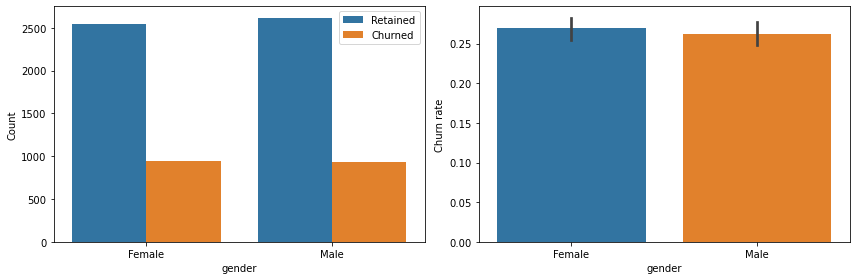

In [17]:
plot_categorical('gender')

Analysis of Gender variable

The data set has almost equal number of Male and Female customers, and both genders are equally likely to Churn or Retain.
The gender variable does not contribute much in determining / predicting if a customer will churn or not.

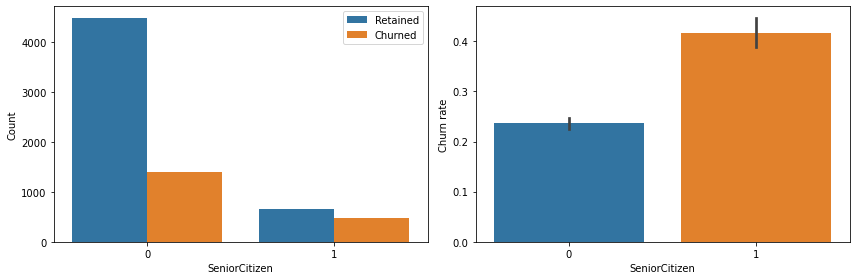

In [18]:
plot_categorical('SeniorCitizen')

Analysis of Senior Citizens variable

The majority of customers are not Senior Citizens. The majority of Senior Citizens are likely to retain, while a slightly less number will considern to Churn.

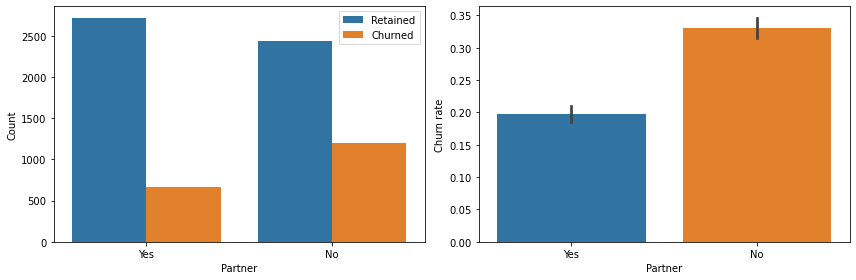

In [19]:
plot_categorical('Partner')

Analysis of Partner

There is a almost equal number of customers who have and do not have partners. There is not significant distinction of churn rate between customers who have partners and those who do not.

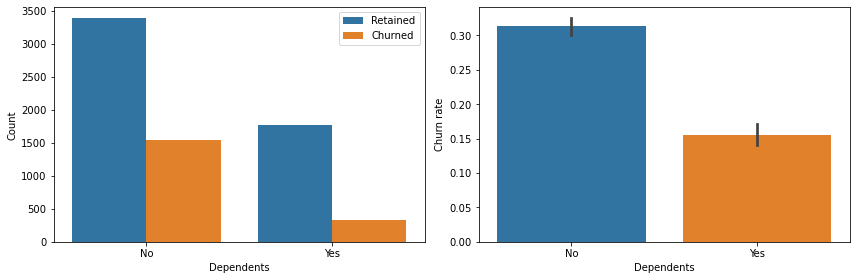

In [20]:
plot_categorical('Dependents')

Analysis of Dependents

The majority of customers do NOT have any dependents. Majority of people regardless if they have dependents are more likely to Retain then churn.

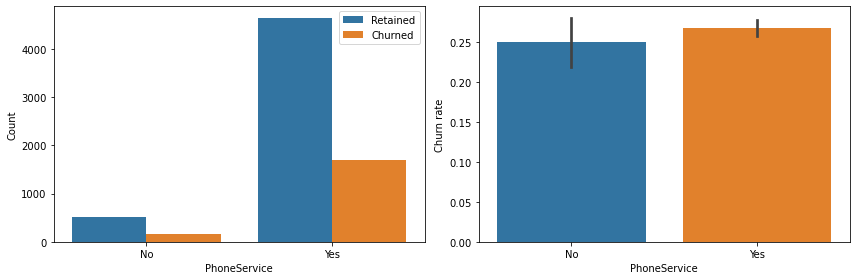

In [21]:
plot_categorical('PhoneService')

Analysis of Phone Service

The majority of customers have a phone service. Those who do not are slightly more likely to Retain then churn. The customers who have phone service are most likely going to Retain then Churn.

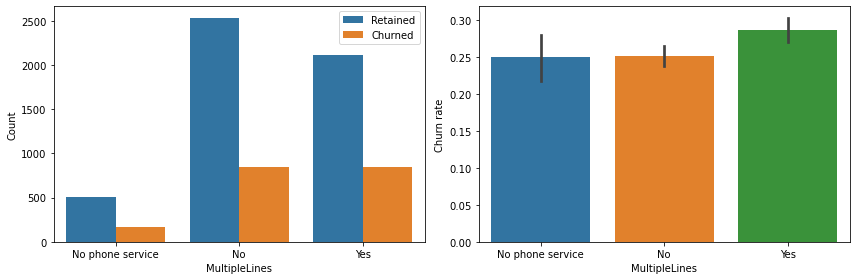

In [22]:
plot_categorical('MultipleLines')

Analysis of Multiple Lines

The number of customers who have multiple lines is marginarlly lesser than number of customers who have no multiple lines (by almost 300). The customers with a single line are in the minority.

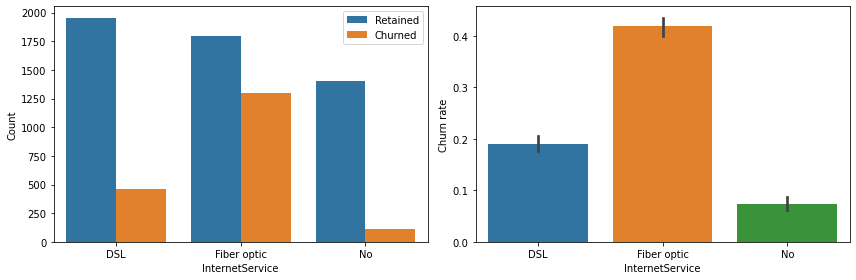

In [23]:
plot_categorical('InternetService')

Analysis of Internet Service

Customers having fiber optic or DSL service is considerably higher than those who have no internet service.

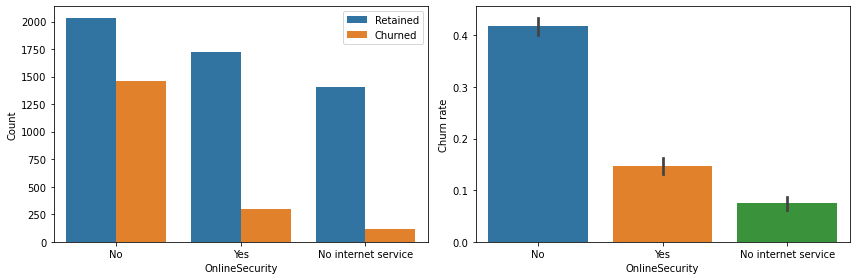

In [24]:
plot_categorical('OnlineSecurity')

Analysis of Online Security

The number of customers who DO NOT have some sort of online security is almost 1500 more than those who have online security.
More people with online security are most likely to Retain than Churn.

<AxesSubplot:title={'center':'OnlineBackup'}, xlabel='OnlineBackup', ylabel='count'>

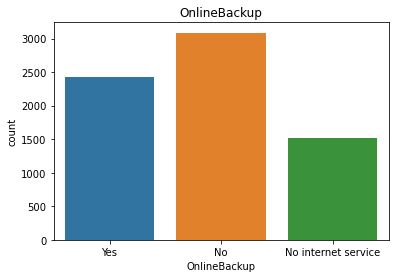

In [25]:
plt.title('OnlineBackup')
sns.countplot(data=df, x=df['OnlineBackup'])

Analysis of Online Backup

There is almost equal balance between the number of customers who have online backup compared to those who do not.

<AxesSubplot:title={'center':'DeviceProtection'}, xlabel='DeviceProtection', ylabel='count'>

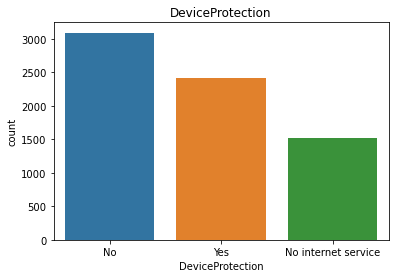

In [26]:
plt.title('DeviceProtection')
sns.countplot(data=df, x=df['DeviceProtection'])

There is almost 3000 people with no Device Protection and 2250 customers with some sort of device prediction (which is similar to the results seen in online security)

<AxesSubplot:title={'center':'TechSupport'}, xlabel='TechSupport', ylabel='count'>

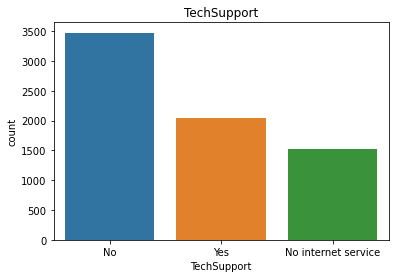

In [27]:
plt.title('TechSupport')
sns.countplot(data=df, x=df['TechSupport'])

The results are similar to Online Security and Device Protection. There are about 1250 people more who have no tech support compared to those who have tech support.


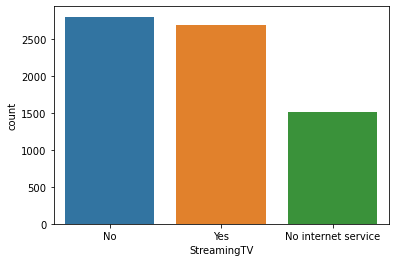

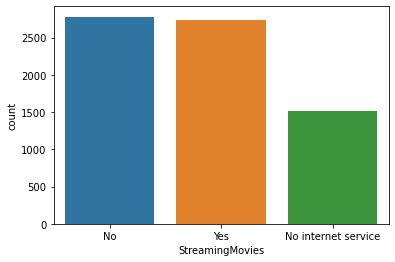

<AxesSubplot:xlabel='Contract', ylabel='count'>

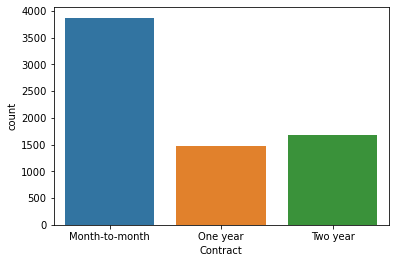

In [28]:
sns.countplot(data=df, x=df['StreamingTV'])
plt.show()
sns.countplot(data=df, x=df['StreamingMovies'])
plt.show()
sns.countplot(data=df, x=df['Contract'])

Almost a equal number of people stream movies and TV compared to those who dont. Also, most people prefer to take monthly subscriptions compared to yearly or biyearly subscriptions.

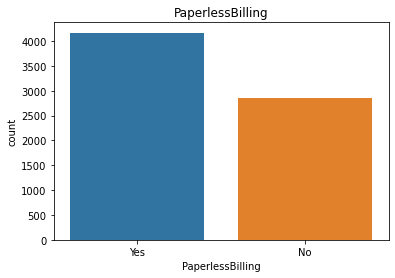

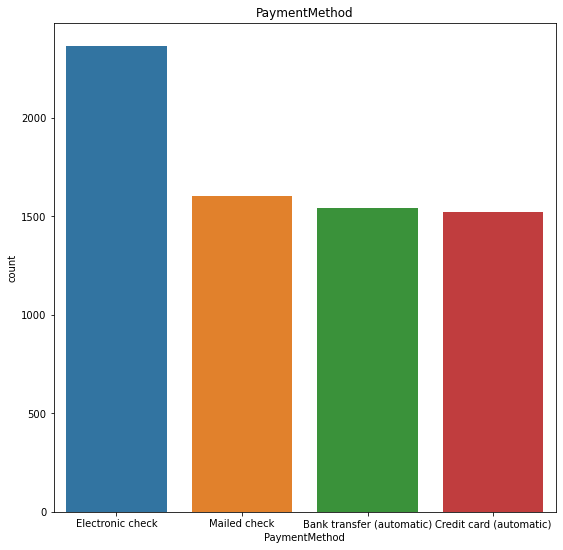

In [29]:
plt.title('PaperlessBilling')
sns.countplot(data=df, x=df['PaperlessBilling'])
plt.show()

plt.figure(figsize=(9,9))
plt.title('PaymentMethod')
sns.countplot(data=df, x=df['PaymentMethod'])
plt.show()

The number of people using paperless billing is must higher than those who dont (can also be observed by the Payment Method table, where msot people prefer Electronic Check, Bank or Credit Card Transfer).

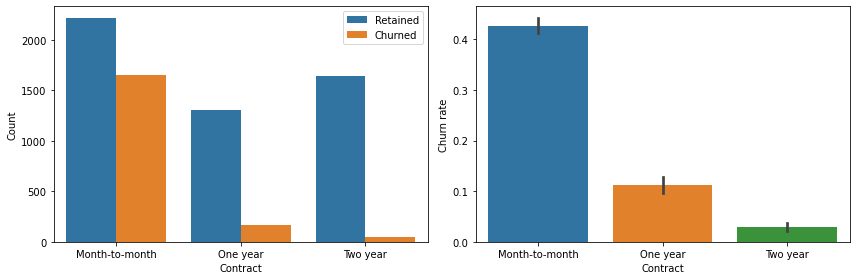

In [30]:
plot_categorical('Contract')

Analysis of Contract

Here, we can see that people with monthly subscriptions are more likely to Churn, while those who have biyearly or yearly subscriptions are less likely to Churn. \
Most people with yearly or biyearly subscriptions will most likely Retain than Churn. 

### Data Preprocessing

Listing out the keys in each column to determine best approach for preprocessing.

In [31]:
for category in categorical:
    print(category, " : ", set(list(df[category])))

gender  :  {'Female', 'Male'}
SeniorCitizen  :  {0, 1}
Partner  :  {'Yes', 'No'}
Dependents  :  {'Yes', 'No'}
PhoneService  :  {'Yes', 'No'}
MultipleLines  :  {'Yes', 'No', 'No phone service'}
InternetService  :  {'DSL', 'No', 'Fiber optic'}
OnlineSecurity  :  {'Yes', 'No internet service', 'No'}
OnlineBackup  :  {'Yes', 'No internet service', 'No'}
DeviceProtection  :  {'Yes', 'No internet service', 'No'}
TechSupport  :  {'Yes', 'No internet service', 'No'}
StreamingTV  :  {'Yes', 'No internet service', 'No'}
StreamingMovies  :  {'Yes', 'No internet service', 'No'}
Contract  :  {'Two year', 'Month-to-month', 'One year'}
PaperlessBilling  :  {'Yes', 'No'}
PaymentMethod  :  {'Mailed check', 'Electronic check', 'Bank transfer (automatic)', 'Credit card (automatic)'}


Data Preprocessing

Perform encoding for the categorical variables in the data frame

In [32]:
from sklearn import preprocessing
LE = preprocessing.LabelBinarizer()
df['gender'] = LE.fit_transform(list(df['gender']))
df['SeniorCitizen'] = LE.fit_transform(list(df['SeniorCitizen']))
df['Partner'] = LE.fit_transform(list(df['Partner']))
df['Dependents'] = LE.fit_transform(list(df['Dependents']))
df['PhoneService'] = LE.fit_transform(list(df['PhoneService']))
df['PaperlessBilling'] = LE.fit_transform(list(df['PaperlessBilling']))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [33]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
df['MultipleLines']= OE.fit_transform(df.MultipleLines.values.reshape(-1,1))
df['InternetService'] = OE.fit_transform(df.InternetService.values.reshape(-1,1))
df['OnlineSecurity'] = OE.fit_transform(df.OnlineSecurity.values.reshape(-1,1))
df['OnlineBackup']=OE.fit_transform(df.OnlineBackup.values.reshape(-1,1))
df['DeviceProtection'] = OE.fit_transform(df.DeviceProtection.values.reshape(-1,1))
df['TechSupport'] = OE.fit_transform(df.TechSupport.values.reshape(-1,1))
df['StreamingTV']= OE.fit_transform(df.StreamingTV.values.reshape(-1,1))
df['StreamingMovies'] = OE.fit_transform(df.StreamingMovies.values.reshape(-1,1))
df['Contract']=OE.fit_transform(df.Contract.values.reshape(-1,1))
df['PaymentMethod']= OE.fit_transform(df.PaymentMethod.values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,2.0,29.85,29.85,0
1,1,0,0,0,34,1,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0,3.0,56.95,1889.50,0
2,1,0,0,0,2,1,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1,3.0,53.85,108.15,1
3,1,0,0,0,45,0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0,0.0,42.30,1840.75,0
4,0,0,0,0,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1,3.0,84.80,1990.50,0
7039,0,0,1,1,72,1,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1,1.0,103.20,7362.90,0
7040,0,0,1,1,11,0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,29.60,346.45,0
7041,1,1,1,0,4,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,74.40,306.60,1


Check the data types of all values (categorical) in each column to determine if any conversion have to be made.

This is done because performing statisticaly measures on larger than required data types and non numerical types (ex : object) 
can give false results when calculating statistical results

In [34]:
# Check the data types of all values in each column to determine if any conversion have to be made.
print(df.dtypes)

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling      int64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


Because of encoding done earlier, all categorical variables are now represented as integer data tyeps. 

Now, we check the max / min range of these variables and perform data compression wherever appropriate

In [35]:
ii8 = np.iinfo(np.int8)
ii16 = np.iinfo(np.int16)
ii32 = np.iinfo(np.int32)
ii64 = np.iinfo(np.int64)

print(ii8.max)
for category in categorical:
    max_value = df[category].max()
    min_value = df[category].min()

    if max_value < ii8.max:
        print("Converting data types of ", category, " to int8 as max value is only : ", max_value)
        df[category] = df[category].astype(np.int8)

    elif max_value < ii16.max:
        print("Converting data types of ", category, " to int16 as max value is only : ", max_value)
        df[category] = df[category].astype(np.int16)

    elif max_value < ii32.max:
        print("Converting data types of ", category, " to int32 as max value is only : ", max_value)
        df[category] = df[category].astype(np.int32)

    elif max_value < ii64.max:
        print("Converting data types of ", category, " to int64 as max value is only : ", max_value)
        df[category] = df[category].astype(np.int64)

print("Data types after performing conversions:")
df.dtypes

127
Converting data types of  gender  to int8 as max value is only :  1
Converting data types of  SeniorCitizen  to int8 as max value is only :  1
Converting data types of  Partner  to int8 as max value is only :  1
Converting data types of  Dependents  to int8 as max value is only :  1
Converting data types of  PhoneService  to int8 as max value is only :  1
Converting data types of  MultipleLines  to int8 as max value is only :  2.0
Converting data types of  InternetService  to int8 as max value is only :  2.0
Converting data types of  OnlineSecurity  to int8 as max value is only :  2.0
Converting data types of  OnlineBackup  to int8 as max value is only :  2.0
Converting data types of  DeviceProtection  to int8 as max value is only :  2.0
Converting data types of  TechSupport  to int8 as max value is only :  2.0
Converting data types of  StreamingTV  to int8 as max value is only :  2.0
Converting data types of  StreamingMovies  to int8 as max value is only :  2.0
Converting data typ

gender                 int8
SeniorCitizen          int8
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

We can observe that TotalCharges has a data type of float64. We check the range of values it holds to determine if casting to a 
smaller type (float16, for example) is possible.

In [36]:
f16 = np.finfo(np.float16)
f32 = np.finfo(np.float32)
f64 = np.finfo(np.float64)

category = 'TotalCharges'

max_value = df[category].max()
min_value = df[category].min()


if max_value < f16.max:
    print("Converting data types of ", category, " to f16 as max value is only : ", max_value)
    df[category] = df[category].astype(np.float16)

elif max_value < f32.max:
    print("Converting data types of ", category, " to f32 as max value is only : ", max_value)
    df[category] = df[category].astype(np.float32)

elif max_value < f64.max:
    print("Converting data types of ", category, " to f64 as max value is only : ", max_value)
    df[category] = df[category].astype(np.float64)

print("New data type of ", category, " : ", df[category].dtype)

Converting data types of  TotalCharges  to f16 as max value is only :  8684.8
New data type of  TotalCharges  :  float16


## Plotting 

<AxesSubplot:>

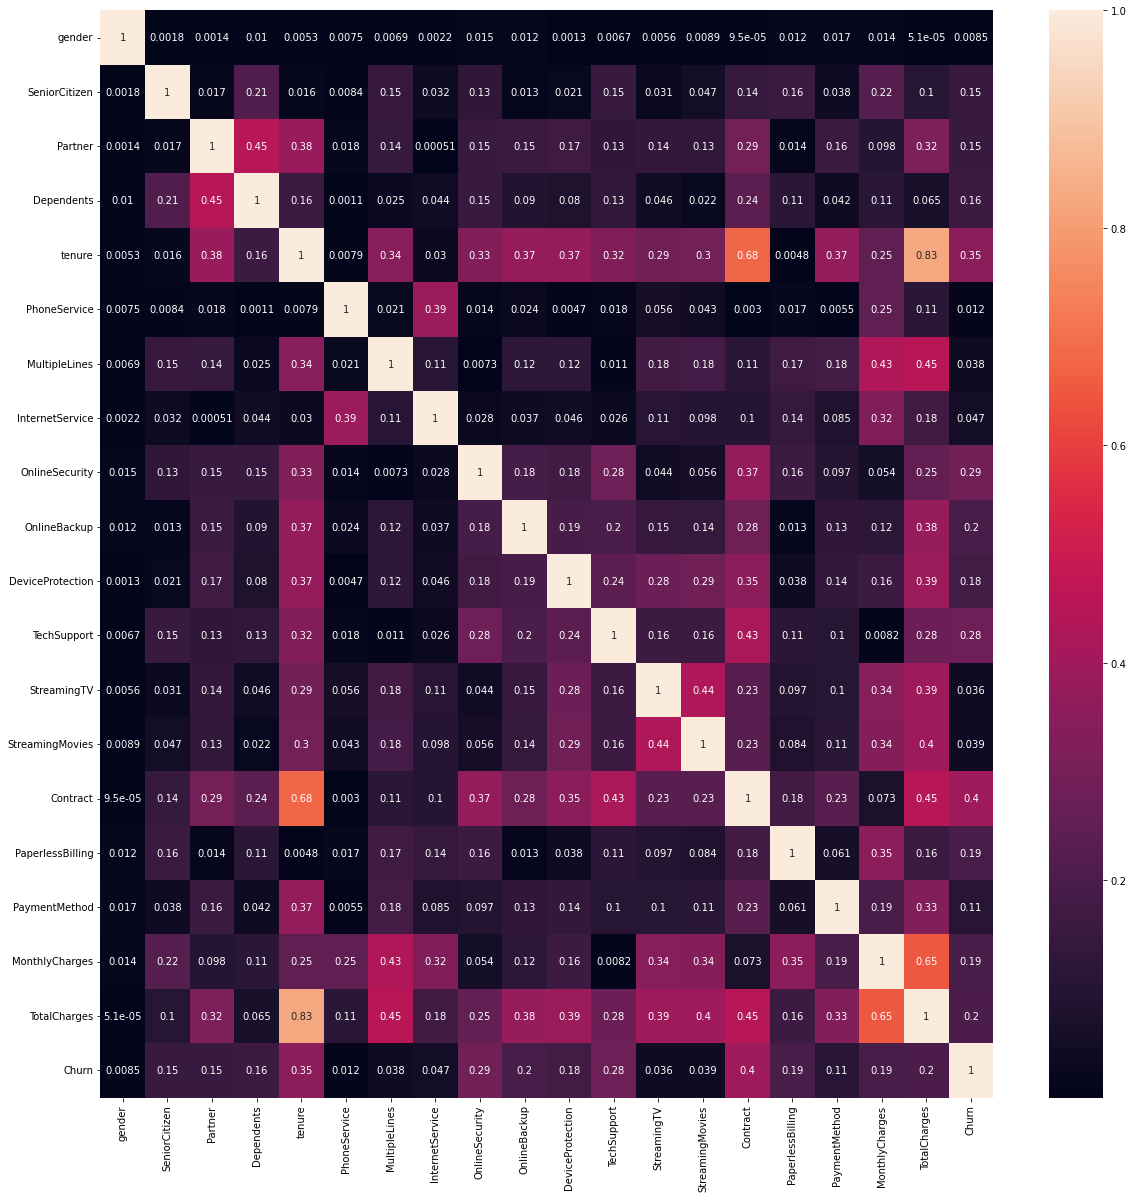

In [37]:
corr = abs(df.corr())
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

Analysis of the HeatMap (correlation Map):

* Correlation between target (Churn) and independent variables \
    We can see the independent variables (gender, phoneService, MultipleLines, InternetService, StreamingTV, StreamingMovies, PaymentMethod) have a correlation value < 0.15 when compared to Churn.
    This implies that we cannot directly uses these variables for prediction using linear regression, but we can definitely use multiple regression, decision tree etc

* Correlation between the independent variables \
    We can see that between the independent variables, the pairs (Contract, Tenure), (TotalCharges, Tenure) and (MonthlyCharges, TotalCharges) have very high correlation values. This significant intercorrelation can cause multicollinearity problems.

Determining which records contribute more towards Churn:

* Correlations of Contract, TotalCharges, and MonthlyCharges, Tenure vs Churn 
    >Contract -> 0.68 \
    TotalCharges -> 0.83 \
    MonthlyCharges -> 0.25 \
    Tenure -> 0.35 

    We could drop MonthlyCharges and Tenure in favour of TotalCharges and MonthlyCharges as the laters have higher correlation with the Target variable. Doing so would remove multicollinearity problems.


Determining outliers in Continuos variables

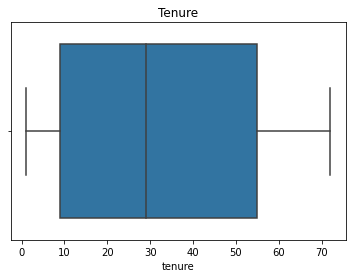

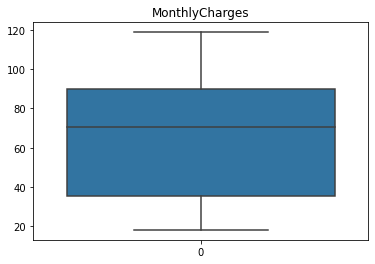

<AxesSubplot:title={'center':'TotalCharges'}>

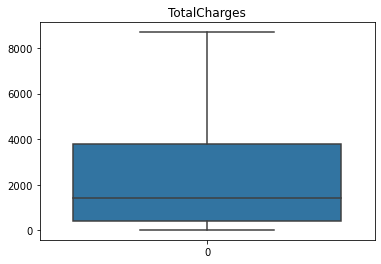

In [38]:
plt.title("Tenure")
sns.boxplot(data=df, x=df['tenure'])
plt.show()

plt.title("MonthlyCharges")
sns.boxplot(data=df['MonthlyCharges'])
plt.show()

plt.title("TotalCharges")
sns.boxplot(data=df['TotalCharges'])

There is no outliers in the continuous variables.

View continuous variables in a histogram to determine if scaling should be used.

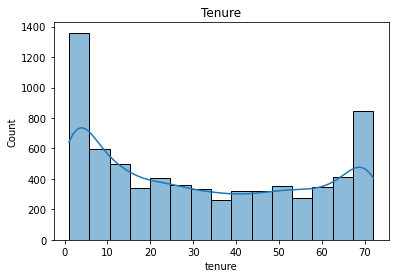

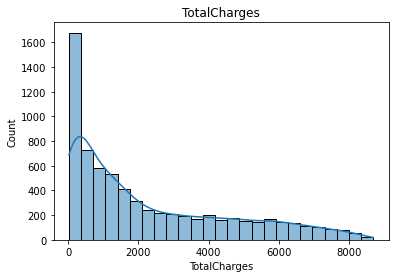

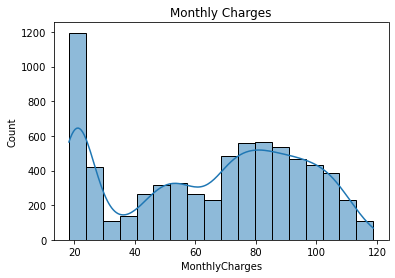

In [39]:
plt.title('Tenure')
sns.histplot(data=df, x=df['tenure'], kde=True)
plt.show()

plt.title('TotalCharges')
sns.histplot(data=df, x=df['TotalCharges'], kde=True)
plt.show()

plt.title('Monthly Charges')
sns.histplot(data=df, x=df['MonthlyCharges'], kde=True)
plt.show()

Inferences
> None of the continuos variables match normal distribution.
> The second graph (i.e TotalCharges) can be scaled using min max scaling as the data should a continuus decreasing trend.
> The third graph (i.e MonthlyCharges) varies on a random basis.


In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.84375,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1890.00000,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.12500,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1841.00000,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.62500,1


In [41]:
# Train and Test split
from sklearn.model_selection import train_test_split as tts 
traindf, testdf = tts(df,test_size=0.2,random_state=42)
print(f"The dimensions of train data frame is {traindf.shape} and test data frame is {testdf.shape}")

The dimensions of train data frame is (5625, 20) and test data frame is (1407, 20)


In [42]:
df.dtypes

gender                 int8
SeniorCitizen          int8
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges        float16
Churn                 int64
dtype: object